Raghavendra Kharosekar

Importing all the required modules

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import yahoo_finance as yhoo
import matplotlib.pyplot as plt
from yahoo_finance import Share
import csv
import datetime

Downloading the important info - opening price,closing price, High,Low, Splits, Dividends and Volume of the 5 Tickers as CSV File.

In [ ]:
yf.Tickers(['AAPL','TSLA','GOOGL','MSFT','AMZN']).download().to_csv('stock_price_info_of_5_Tickers.csv')

[*********************100%***********************]  5 of 5 completed


Creating a csv file of basic information of 5 Tickers

In [ ]:
def info_func(ticker_name):
    '''
    This Functions returns all the information of the Ticker
    '''
    T_name = yf.Ticker(ticker_name)
    key_list = list(T_name.info.keys())
    val_list = list(T_name.info.values())
    df = pd.DataFrame(data=val_list,index=key_list)
    info_df  = df.transpose().rename(index={0:ticker_name})
    
    return info_df

a =info_func('AAPL')
b =info_func('GOOG')
c =info_func('TSLA')
d =info_func('MSFT')
e =info_func('AMZN')
pd.concat([a,b,c,d,e]).to_csv('info_of_Tickers.csv')

Retrieving the Dividend (if any provided by the company)

In [ ]:
def dividend_func(ticker_name):
    '''
    This function returns Dividends provided by the company over the years-[if provided], and a graph.
    '''
    if yf.Ticker(ticker_name).dividends.empty:
        print("The Company never offered Dividend to its stake holders")
    else:
        divi = pd.DataFrame(yf.Ticker(ticker_name).dividends)
        return divi


Plotting a graph of Opening and closing prices

In [ ]:
def history_func(ticker_name):
    '''
    This function gives a graph of variation Opening price and closing price over time.
    '''
    Open_price_list = yf.Ticker(ticker_name).history()['Open']
    close_price_list = yf.Ticker(ticker_name).history()['Close']
    indx_lst = yf.Ticker(ticker_name).history().index
    plt.plot(indx_lst,Open_price_list,label='Opening Price')
    plt.plot(indx_lst,close_price_list,label='Closing Price')
    plt.xticks(rotation=45)
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.title('Variation of Opening and Closing prices')
    plt.legend()


Retrieving the top 5 Share Holders

In [ ]:
def shareholders(ticker_name):
    '''
    This func provides a DataFrame of the top 5 Stake Holders in the company.
    '''
    global df1
    df11 = yf.Ticker(ticker_name).get_institutional_holders().head()
    df11.index = [1,2,3,4,5]
    return df11

Retrieving the Average revenue, environmental score and social score

In [ ]:
def other_factors(ticker_name):
    '''
    This func gives the average rev, env. score and social score of the Company.
    '''
    df1 = yf.Ticker(ticker_name).calendar.loc['Revenue Average'][0]
    df2 = yf.Ticker(ticker_name).sustainability.loc['socialScore']
    df3 = yf.Ticker(ticker_name).sustainability.loc['environmentScore']
    print('The average revenue of {} is {}'.format(ticker_name,df1))
    print('The Social score of {} is {}'.format(ticker_name,df2[0]))
    print('The Environmental score of {} is {}'.format(ticker_name,df3[0]))
# other_factors('AAPL')

The final function to call all the functions (except dividend func)

In [ ]:
def main_func(ticker_name):
    history_func(ticker_name)
    other_factors(ticker_name)
    divi_var =dividend_func(ticker_name)
    b = (shareholders(ticker_name))
    return divi_var, b

Below is the Analysis of 'AAPL' - APPLE INC.

The average revenue of AAPL is 63962000000
The Social score of AAPL is 12.98
The Environmental score of AAPL is 0.49


,Dividends
Date,
1987-05-11,0.00214
1987-08-10,0.00214
1987-11-17,0.00286
1988-02-12,0.00286
1988-05-16,0.00286
...,...
2019-08-09,0.77000
2019-11-07,0.77000
2020-02-07,0.77000


,Holder,Shares,Date Reported,% Out,Value
1,"Vanguard Group, Inc. (The)",336728608,2020-03-30,0.0788,85626717728
2,Blackrock Inc.,274684501,2020-03-30,0.0642,69849521759
3,"Berkshire Hathaway, Inc",245155566,2020-03-30,0.0573,62340608878
4,State Street Corporation,180558954,2020-03-30,0.0422,45914336412
5,"Advisor Group, Inc.",116768396,2020-03-30,0.0273,29693035418


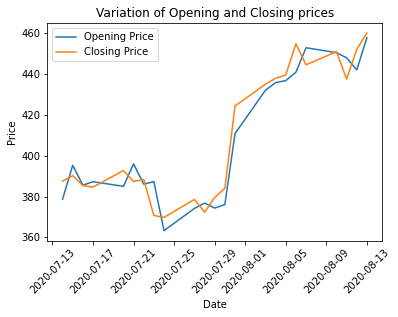

In [ ]:
a,b = main_func('AAPL')
display(a,b)

Below is the Analysis of 'GOOGL' - ALPHABET INC.

The average revenue of GOOGL is 42727600000
The Social score of GOOGL is 15.89
The Environmental score of GOOGL is 0.9
The Company never offered Dividend to its stake holders


None

,Holder,Shares,Date Reported,% Out,Value
1,"Vanguard Group, Inc. (The)",23553069,2020-03-30,0.0784,27367488524
2,Blackrock Inc.,20100166,2020-03-30,0.0669,23355387883
3,"FMR, LLC",12852942,2020-03-30,0.0428,14934475956
4,State Street Corporation,11689009,2020-03-30,0.0389,13582044007
5,Price (T.Rowe) Associates Inc,7084564,2020-03-30,0.0236,8231909139


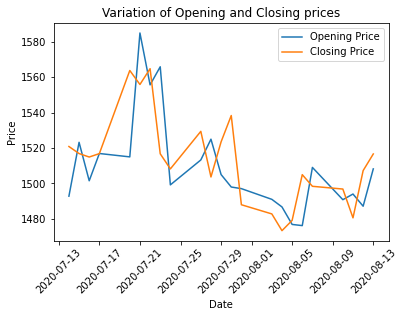

In [ ]:
a,b = main_func('GOOGL')
display(a,b)

Below is the Analysis of 'MSFT' - MICROSOFT INC.

The average revenue of MSFT is 35689500000
The Social score of MSFT is 9.37
The Environmental score of MSFT is 0.47000000000000003


,Dividends
Date,
2003-02-19,0.08
2003-10-15,0.16
2004-08-23,0.08
2004-11-15,3.08
2005-02-15,0.08
...,...
2019-05-15,0.46
2019-08-14,0.46
2019-11-20,0.51


,Holder,Shares,Date Reported,% Out,Value
1,"Vanguard Group, Inc. (The)",640172572,2020-03-30,0.0846,100961616330
2,Blackrock Inc.,517578906,2020-03-30,0.0684,81627369265
3,State Street Corporation,314771248,2020-03-30,0.0416,49642573522
4,"FMR, LLC",237892832,2020-03-30,0.0314,37518078534
5,Price (T.Rowe) Associates Inc,172056401,2020-03-30,0.0227,27135015001


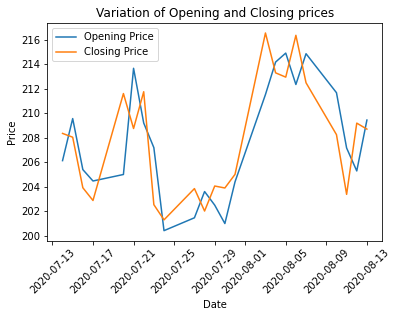

In [ ]:
a,b = main_func('MSFT')
display(a,b)

Below is the Analysis of 'TSLA' - TESLA INC.

The average revenue of TSLA is 8066680000
The Social score of TSLA is 17.31
The Environmental score of TSLA is 2.75
The Company never offered Dividend to its stake holders


None

,Holder,Shares,Date Reported,% Out,Value
1,Baillie Gifford and Company,11771213,2020-06-29,0.0632,12710673509
2,Capital World Investors,10714131,2020-03-30,0.0575,5614204644
3,"Vanguard Group, Inc. (The)",8662781,2020-03-30,0.0465,4539297244
4,Blackrock Inc.,7213587,2020-03-30,0.0387,3779919588
5,"FMR, LLC",4615556,2020-03-30,0.0248,2418551344


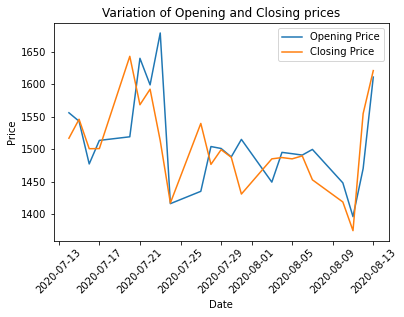

In [ ]:
a,b = main_func('TSLA')
display(a,b)

Below is the Analysis of 'AMZN' - AMAZON INC.

The average revenue of AMZN is 92394900000
The Social score of AMZN is 13.74
The Environmental score of AMZN is 5.82
The Company never offered Dividend to its stake holders


None

,Holder,Shares,Date Reported,% Out,Value
1,"Advisor Group, Inc.",35429155,2020-03-30,0.0707,69076932086
2,"Vanguard Group, Inc. (The)",32975915,2020-03-30,0.0658,64293800993
3,Blackrock Inc.,27023092,2020-03-30,0.0540,52687462934
4,State Street Corporation,16267474,2020-03-30,0.0325,31717019407
5,"FMR, LLC",15839627,2020-03-30,0.0316,30882837554


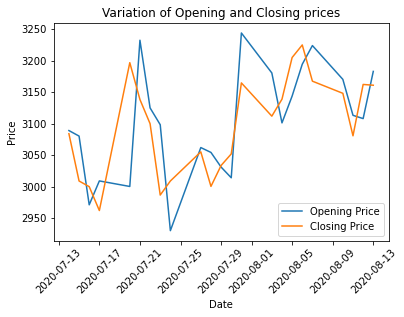

In [ ]:
a,b = main_func('AMZN')
display(a,b)